<a href="https://colab.research.google.com/github/Kamal-Moha/Food-Sales-Predictions/blob/main/Food_Sales_Prediction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
filename = '/content/drive/MyDrive/CODING DOJO DS BOOTCAMP/02 Week 2: Pandas/Assignments/Core Assignments/sales_predictions.csv'

In [81]:
df = pd.read_csv(filename)

In [82]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


1. **How many rows and columns?**

In [83]:
df.shape

(8523, 12)

2. **What are the datatypes of each variable?**


In [84]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3. **Are there duplicates? If so, drop any duplicates.**

In [85]:
df.duplicated().sum()

0

It looks like our dataset doesn't contain any duplicates which is a good thing

4. **Identify missing values.**

In [86]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

It looks like the columns Item_Weight and Outlet_Size have missing values and we are going to need to address that


*   **For the Outlet_Size column**



> This column represents the size of the store in terms of ground area covered.



> It doesn't have any significant effect on our analysis as it doesn't serve the purpose of our analysis which is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.



> So with that said, **I will drop this column from our dataset.**












In [87]:
# Dropping the Outlet_Size column
df.drop(columns='Outlet_Size', inplace=True)

# Checking for missing values again
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


*   **For the Item_Weight column**



> This column represents the Weight of the product which is gonna be an important thing as it will the weights of products that are having high sales



> I will **fill the missing values** of the Item_Weight column if there are any with the mean weight of the Item_Identifier it has.


> I choose to use the mean to fill the missing values for this column because mean enables us to use the average value/weight and this provides us with roughly the same values for our analysis.











In [88]:
# Group the DataFrame by the Item_Identifier column and calculate the mean weight for each identifier
mean_weights = df.groupby('Item_Identifier')['Item_Weight'].transform('mean')
mean_weights

# Fill the missing values in the Item_Weight column with the mean weight for each identifier
df['Item_Weight'].fillna(mean_weights, inplace=True)

# Checking for missing values in our dataframe again
df.isna().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Even after doing that. There are still 4 rows that are still missing Item_Weight values. 

We shall just get rid of those 4 rows that have missing weights.

In [89]:
# Dropping the 4 rows that still have missing Item_Weight values
df.dropna(subset=['Item_Weight'], inplace=True)

# checking for missing values again
df.isna().sum()

# Our data now doesn't have any missing values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**Great**. We are now **FREE** of missing values

7. **Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent)** 

In [90]:
# Iterating through each column to find the column that has inconsistent data
for col in df.columns:
    print("Column:", col)
    print(df[col].value_counts(), "\n")

Column: Item_Identifier
FDG33    10
FDW13    10
FDV60     9
FDU12     9
FDX20     9
         ..
DRF48     1
FDY43     1
FDC23     1
FDO33     1
FDT35     1
Name: Item_Identifier, Length: 1555, dtype: int64 

Column: Item_Weight
12.150    105
17.600    102
13.650     89
11.800     86
15.100     86
         ... 
6.985       1
6.765       1
12.300      1
7.260       1
7.470       1
Name: Item_Weight, Length: 446, dtype: int64 

Column: Item_Fat_Content
Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 

Column: Item_Visibility
0.000000    526
0.076975      3
0.107037      2
0.061271      2
0.046825      2
           ... 
0.056387      1
0.013957      1
0.110460      1
0.124646      1
0.044878      1
Name: Item_Visibility, Length: 7876, dtype: int64 

Column: Item_Type
Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned 

I have noticed the **Item_Fat_Content** column has inconsistent data and I need to fix that.

In [91]:
df['Item_Fat_Content'].value_counts()

Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [92]:
# Replacing values LF, reg, low fat to their appropriate values
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg':'Regular', 'low fat': 'Low Fat', 'regular': 'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

8. **For any numerical columns, obtain the summary statistics of each (min, max, mean)**

In [93]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,12.875420,0.066112,141.010019,1997.837892,2181.188779
std,4.646098,0.051586,62.283594,8.369105,1706.511093
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026983,93.844900,1987.000000,834.247400
50%,12.650000,0.053925,143.047000,1999.000000,1794.331000
75%,16.850000,0.094558,185.676600,2004.000000,3100.630600
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**PART 3**

In [94]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


# **Histograms**

Text(0, 0.5, 'Count')

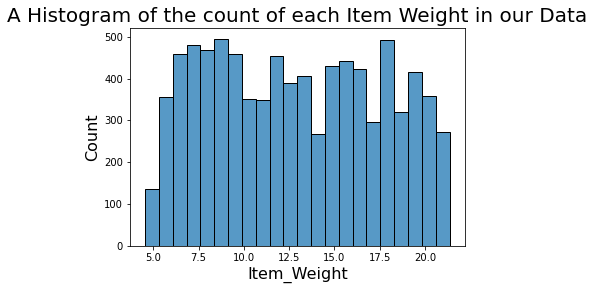

In [95]:
# Making a histogram for the Item_Weight column
sns.histplot(data=df, x='Item_Weight')

plt.title('A Histogram of the count of each Item Weight in our Data', fontsize=20)
plt.xlabel('Item_Weight', fontsize=16)
plt.ylabel('Count', fontsize=16)

You can see from the above histogram that most of the products have a weight above 5.

Text(0, 0.5, 'Count of Stores')

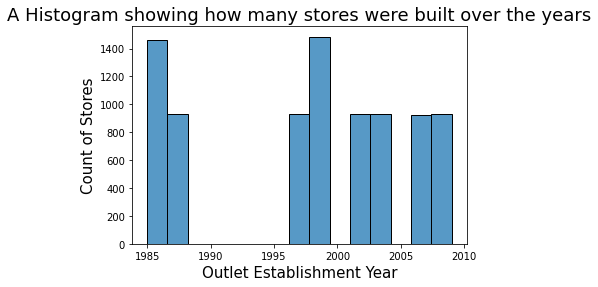

In [96]:
# Making a histogram for the Outlet_Establishment_Year
sns.histplot(data=df, x='Outlet_Establishment_Year');

# Creating a title for the plot
plt.title('A Histogram showing how many stores were built over the years', fontsize=18)

# Creating labels for the x-axis and y-axis
plt.xlabel('Outlet Establishment Year', fontsize=15)
plt.ylabel('Count of Stores', fontsize=15)

You can see from this histogram that there weren't any stores built between 1987 to 1996. So for around 10 years, no new stores were built.

Most stores were built after 1996.

Text(0, 0.5, 'Count')

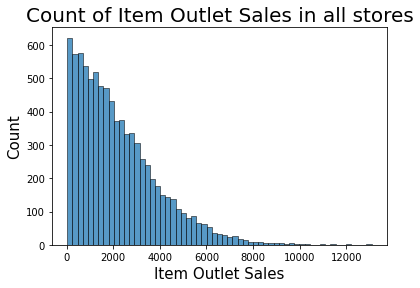

In [97]:
# Creating the histogram
sns.histplot(data=df, x='Item_Outlet_Sales');

# Title for the plot
plt.title('Count of Item Outlet Sales in all stores', fontsize=20)
# Labels for x-axis and y-axis
plt.xlabel('Item Outlet Sales', fontsize=15)
plt.ylabel('Count', fontsize=15)

# **Boxplots**

Text(0, 0.5, 'Item Weight')

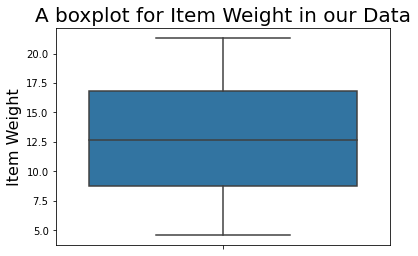

In [98]:
# Making a boxplot for Item_Weight column
sns.boxplot(data=df, y='Item_Weight');

# Title for our our boxplot
plt.title('A boxplot for Item Weight in our Data', fontsize=20)  

plt.ylabel('Item Weight', fontsize=16)

From this boxplot;


> The median Item_Weight is around 12.8


> The minimum Item_Weight is close to 5 with the maximum Item_Weight exceeding 20.


> We don't have outliers in Item_Weight which is a good thing






Text(0, 0.5, 'Item_Outlet_Sales')

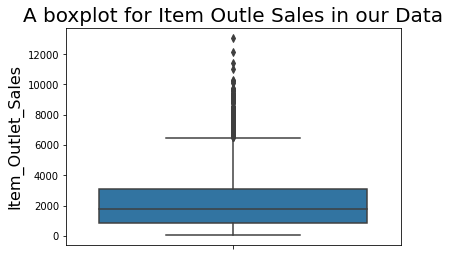

In [99]:
# Making a boxplot for Item_Outlet_Sales column
sns.boxplot(data=df, y='Item_Outlet_Sales');

# Title for our plot
plt.title('A boxplot for Item Outle Sales in our Data', fontsize=20)

plt.ylabel('Item_Outlet_Sales',fontsize=16)

From this boxplot;


> Our Item_Outlet_Sales have a median sales amount around 2000.


> Our boxplot also many outliers meaning there are certain products that are having much higher sales amount than the rest.








In [100]:
# Creating a correlation variable for my dataframe
corr = df.corr()

Text(0.5, 1.0, 'A Heatmap of our Data showing correlation between features')

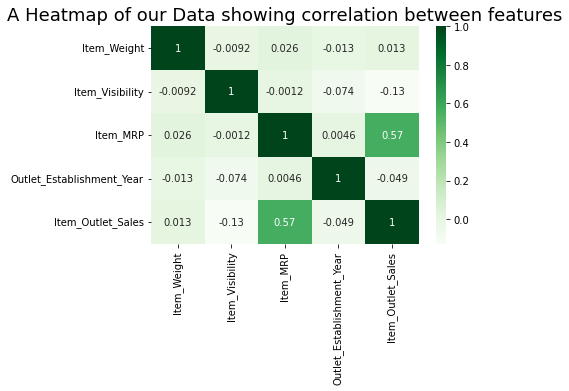

In [101]:
# Creating a heatmap
sns.heatmap(corr, cmap='Greens', annot=True);

# Title
plt.title('A Heatmap of our Data showing correlation between features', fontsize=18)

We can see from our heatmap that we find a moderate **positive correlation**  between Item_Outlet_Sales and Item_MRP. 

**Finding the product with the most sales using Item_Identifier and Item_Outlet_Sales**

In [102]:
# First grouping by Item_Identifier and then finding the sum of Item_Outlet_Sales 
grouped_pdcts = df.groupby('Item_Identifier')['Item_Outlet_Sales'].sum()

# Sorting the resulting object in descending order
sort_grouped_pdcts = grouped_pdcts.sort_values(ascending = False)

# Showcasing the top 5 products with highest sum sales 
sort_grouped_pdcts.head()


Item_Identifier
FDY55    42661.8008
FDA15    41584.5364
FDZ20    40185.0248
FDF05    36555.7490
FDA04    35741.4756
Name: Item_Outlet_Sales, dtype: float64

This gives us a good look at which products drive the **most business** meaning the stores should always have these goods in store.

# **PART 4**

In [103]:
sales = list(sort_grouped_pdcts.head().values)
products = list(sort_grouped_pdcts.head().index)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Sales')

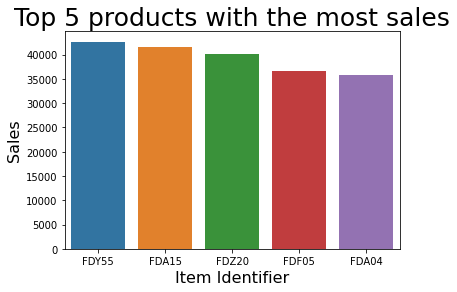

In [104]:
# ploting the barplot of the top 5 products
sns.barplot(products, sales);
plt.title('Top 5 products with the most sales', fontsize = 25)
plt.xlabel('Item Identifier', fontsize=16)
plt.ylabel('Sales',fontsize=16)


**Finding the stores with the most sales using Outlet_Identifier and Item_Outlet_Sales**

In [105]:
# grouping our df by Outlet_Identifier and then finding the sum of sales
grouped_stores = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum()
# sorting grouped_stores in descending order 
sort_grouped_stores = grouped_stores.sort_values(ascending=False)

# Breaking down our sorted stores and finding the top 3 stores
stores_sales = sort_grouped_stores.head(3).values
stores_identifeir = sort_grouped_stores.head(3).index


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Store Sales in Millions')

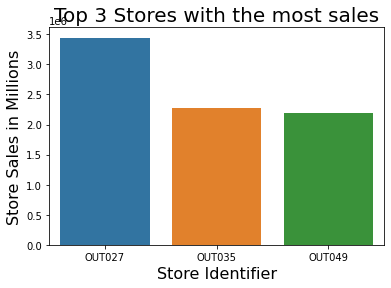

In [106]:
# showcasing a barplot of the top 3 stores with the most sales
sns.barplot(stores_identifeir, stores_sales);

# title for our plot
plt.title('Top 3 Stores with the most sales', fontsize=20)
plt.xlabel('Store Identifier', fontsize=16)
plt.ylabel('Store Sales in Millions', fontsize=16)


We can clearly from see from this plot that;


> Store **OUT027** out-performs all other stores. 




In [107]:
# Let's further explore store OUT027
# Let's see the percentage of sales store OUT027 brings in compared to the total sales of all stores

# Getting total sales for all stores
total_sales = grouped_stores.sum()

# Getting sales made my store OUT027
store_OUT027 = df[df['Outlet_Identifier'] == 'OUT027']['Item_Outlet_Sales'].sum()

# Percentage comparison
(store_OUT027/total_sales)*100


18.537037433834918

We see that store **OUT027** brings in close to 20% of our sales.

This means that we should make sure that this store should have the most focus and should always be fully stocked.
